In [1]:
# !pip install yfinance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2015-01-01'
end = '2025-02-20'
stocks = 'ADANIPOWER.NS'

data = yf.download(stocks, start, end)


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data

Price,Close,High,Low,Open,Volume
Ticker,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS
Date,,,,,
2015-01-01,44.200001,44.349998,43.799999,44.099998,1790247
2015-01-02,44.950001,45.299999,44.200001,44.200001,2926043
2015-01-05,45.099998,46.000000,44.849998,45.000000,3236445
2015-01-06,44.049999,45.750000,43.549999,44.750000,5952755
2015-01-07,44.150002,44.700001,43.299999,43.900002,3820161
...,...,...,...,...,...
2025-02-13,498.149994,506.200012,493.100006,503.000000,3508204
2025-02-14,488.649994,501.500000,484.049988,500.500000,3292927


In [5]:
data.reset_index(inplace=True)

In [6]:
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS,ADANIPOWER.NS
0,2015-01-01,44.200001,44.349998,43.799999,44.099998,1790247
1,2015-01-02,44.950001,45.299999,44.200001,44.200001,2926043
2,2015-01-05,45.099998,46.000000,44.849998,45.000000,3236445
3,2015-01-06,44.049999,45.750000,43.549999,44.750000,5952755
4,2015-01-07,44.150002,44.700001,43.299999,43.900002,3820161
...,...,...,...,...,...,...
2499,2025-02-13,498.149994,506.200012,493.100006,503.000000,3508204
2500,2025-02-14,488.649994,501.500000,484.049988,500.500000,3292927
2501,2025-02-17,490.250000,494.899994,472.149994,480.600006,3862418


In [7]:
moving_average_100days = data.Close.rolling(100).mean()

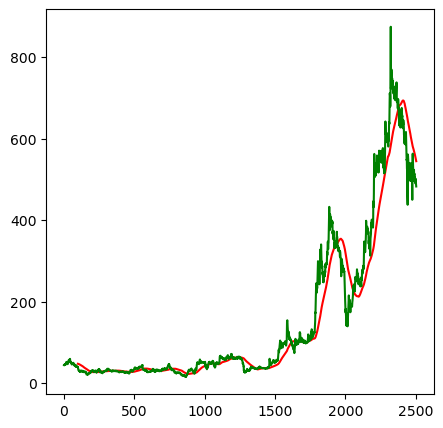

In [8]:
plt.figure(figsize=(5,5))
plt.plot(moving_average_100days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
moving_avg_200days = data.Close.rolling(200).mean()

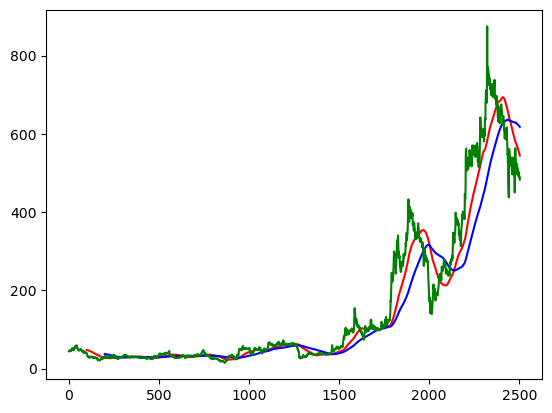

In [10]:
plt.plot(moving_average_100days, 'r')
plt.plot(moving_avg_200days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [11]:
data.dropna(inplace=True)

In [12]:
data_train = pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [13]:
data_train.shape[0]

2003

In [14]:
data_test.shape[0]

501

In [15]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler= MinMaxScaler(feature_range=(0,1))

data_train_scaler = min_max_scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scaler.shape[0]):
    x.append(data_train_scaler[i-100:i])
    y.append(data_train_scaler[i,0])

In [ ]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
x,y = np.array(x), np.array(y)

In [19]:
model = Sequential()

model.add(LSTM(units = 50, activation='relu', return_sequences=True, input_shape= ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
               
model.add(LSTM(units = 80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

C:\Users\palla\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
model.fit(x, y ,epochs=50, batch_size=32, verbose=1)

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 14s 147ms/step - loss: 0.0455
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0085
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0055
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 0.0043
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0038
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0034
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 140ms/step - loss: 0.0036
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 8s 139ms/step - loss: 0.0033
Epoch 9/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - loss: 0.0031
Epoch 10/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 144ms/step - loss: 0.0030
Epoch 11/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 145ms/step - loss: 0.0030
Epoch 12/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0031
Epoch 13/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - loss: 0.0028
Epoch 14/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - loss: 0.0029
Epoch 15/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 9s 146ms/step - l

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pass_100days = data_train.tail(100)

In [24]:
data_test = pd.concat([pass_100days, data_test], ignore_index=True)

In [28]:
data_test_scaler= min_max_scaler.fit_transform(data_test)

In [29]:
x = []
y = []

for i in range(100, data_test_scaler.shape[0]):
    x.append(data_test_scaler[i-100:i])
    y.append(data_test_scaler[i,0])

In [30]:
x,y = np.array(x), np.array(y)

In [31]:
y_predict = model.predict(x)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step


In [37]:
scale = 1/min_max_scaler.scale_

In [38]:
y_predict= y_predict*scale

In [39]:
y= y*scale

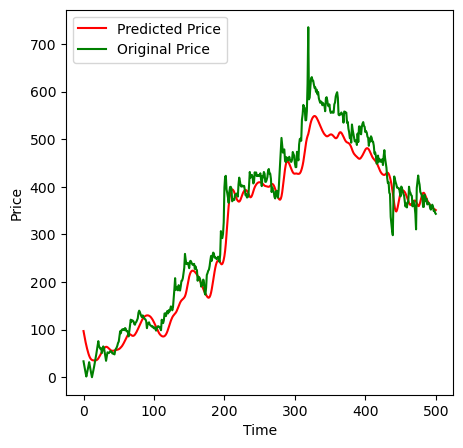

In [40]:
plt.figure(figsize=(5,5))
plt.plot(y_predict, 'r', label= 'Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [42]:
model.save('StockPredictionModels.keras')